## Optimizing Data Engineering Pipelines for Improved Forecasting at Delhivery

### Project Goals:

    Clean and preprocess raw data to extract meaningful features.
    Develop robust forecasting models using processed data.
    Implement models to optimize logistics operations, enhance efficiency, and improve profitability.
    Maintain a competitive advantage by leveraging data-driven insights for strategic decision-making.

The successful implementation of this project will enable Delhivery to harness its data assets effectively, driving operational excellence, improving customer satisfaction, and achieving sustainable growth in the competitive logistics and e-commerce landscape of India.



#### Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\scaler assignment\delhivery_data.csv')
df1

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


### 1. Basic data cleaning and exploration:

In [3]:
df1.shape

(144867, 24)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
df1.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [6]:
df1.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],inplace=True)

In [7]:
df1.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


In [8]:
df1.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [9]:
#converting od start time and od end time to pandas date time format
df1['od_start_time']=pd.to_datetime(df1['od_start_time'])
df1['od_end_time']=pd.to_datetime(df1['od_end_time'])
df1['trip_creation_time']=pd.to_datetime(df1['trip_creation_time'])

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [11]:
df1['source_center'].nunique()

1508

In [12]:
df1['source_name'].nunique()

1498

In [13]:
df1['destination_center'].nunique()

1481

In [14]:
df1['destination_name'].nunique()

1468

#### Univariate Analysis:

##### Continous variable

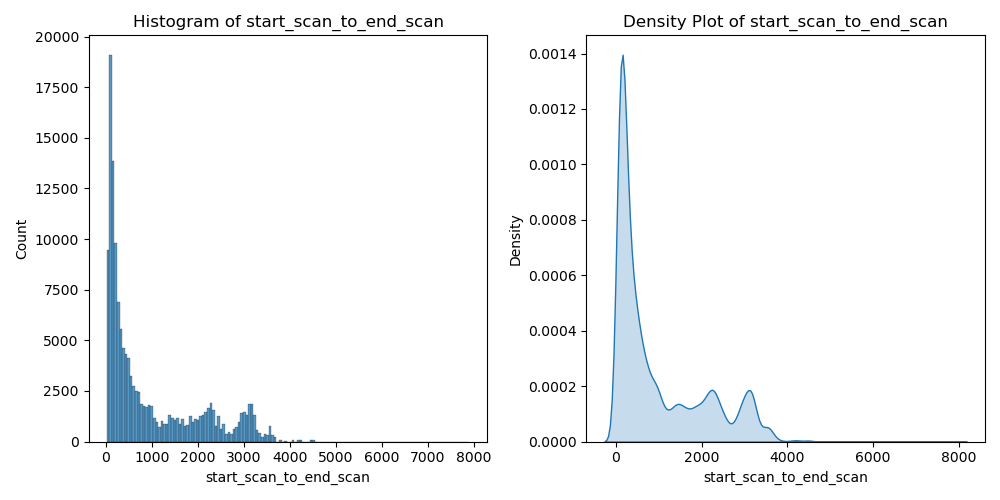

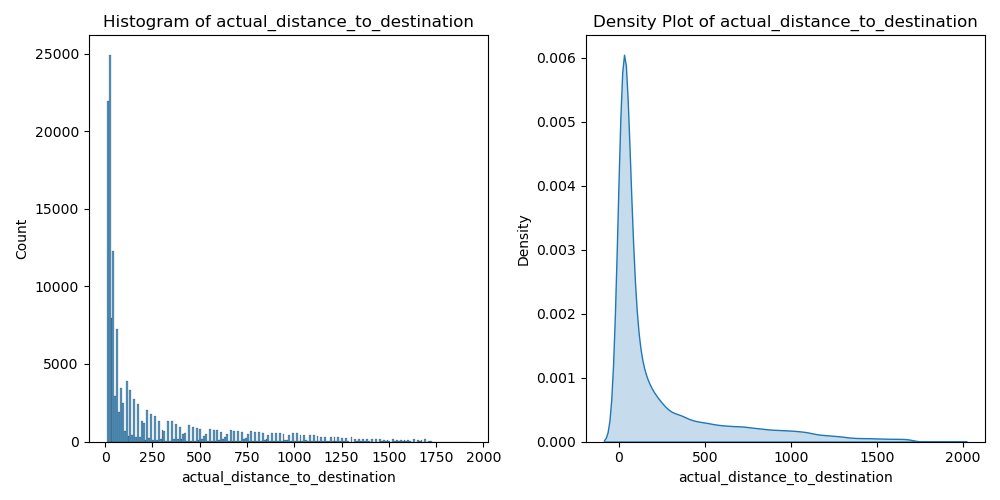

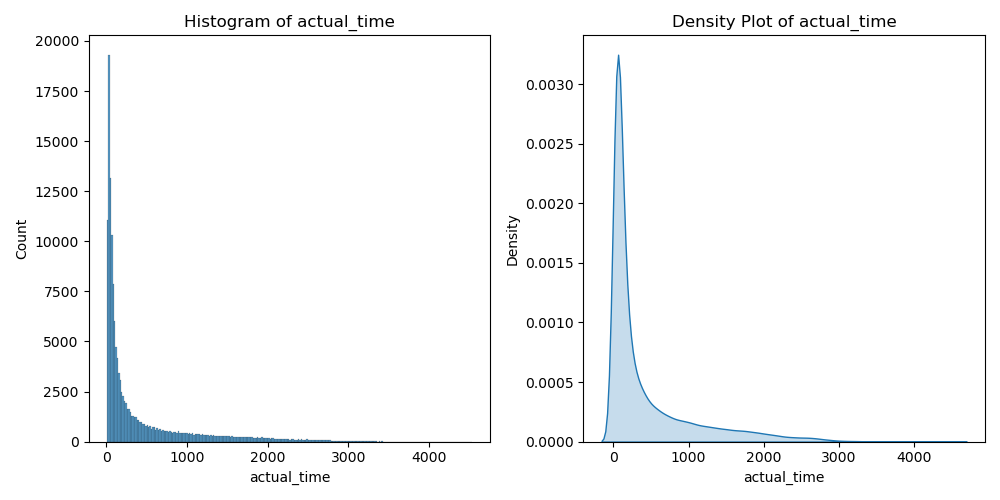

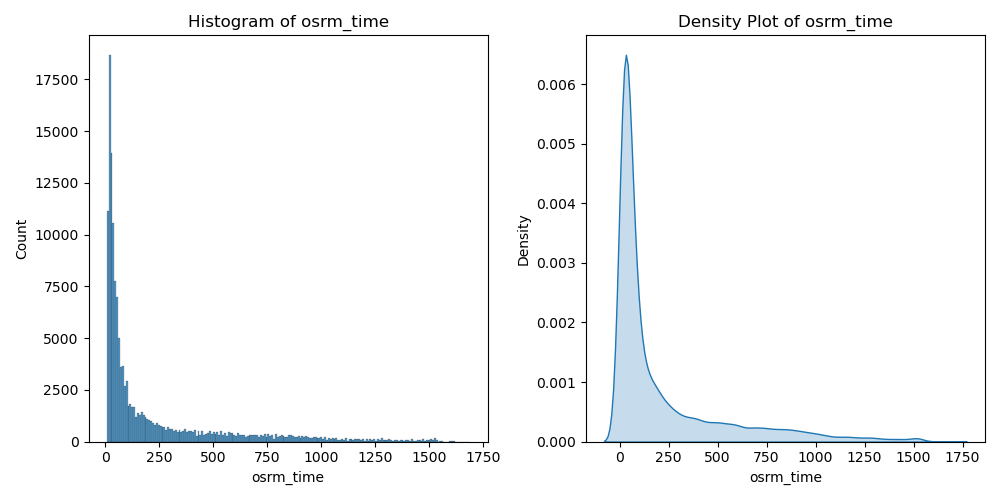

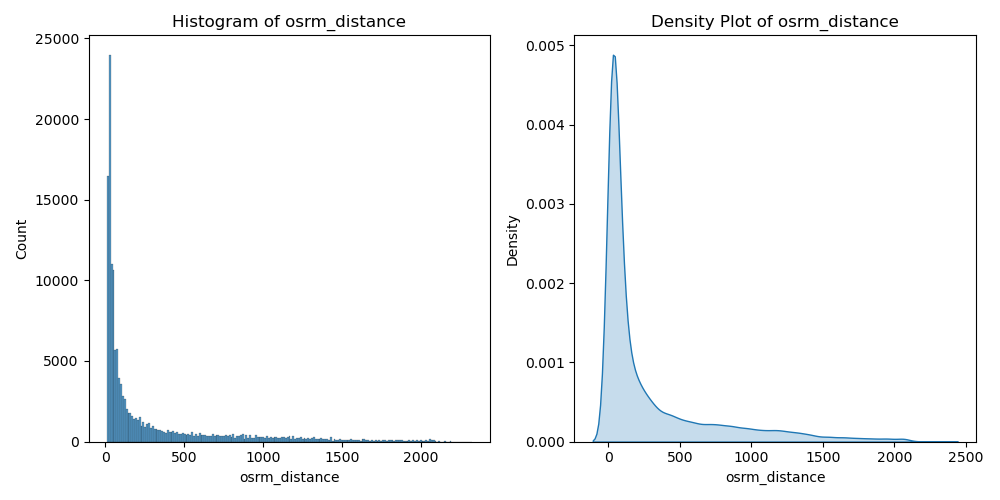

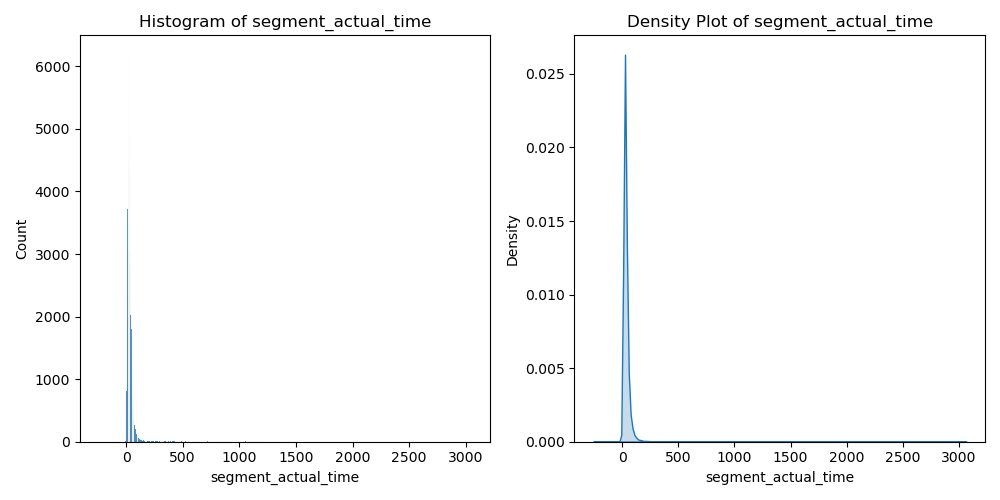

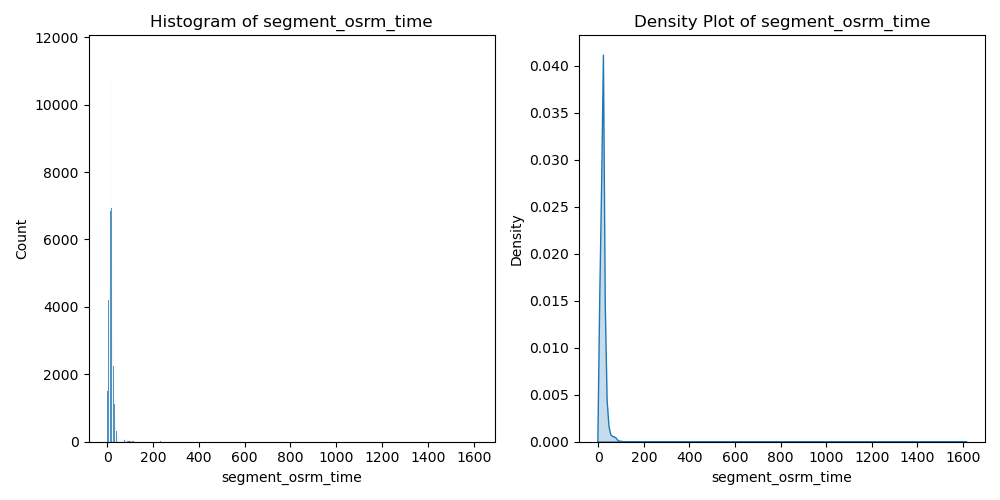

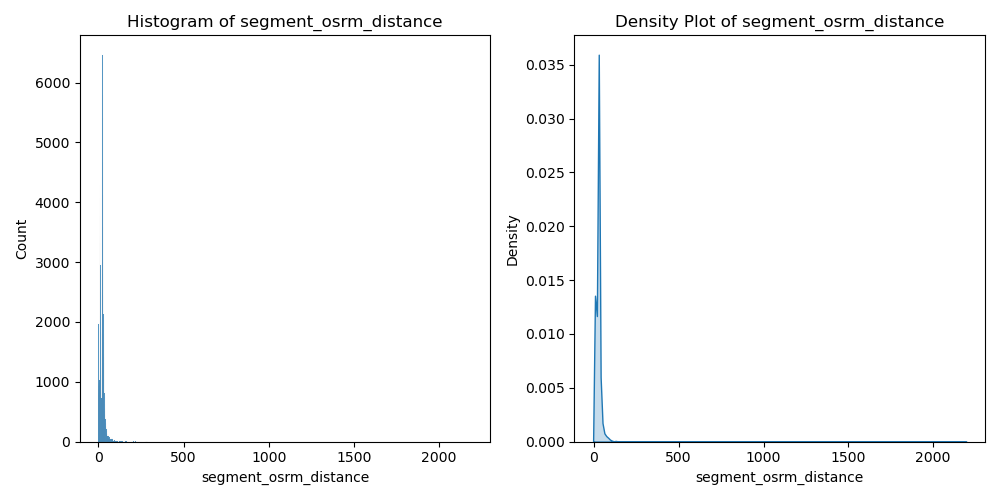

In [15]:
from IPython.display import Image, display


# Continuous variables
continuous_vars = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plotting histograms and density plots and saving the figures
for i, var in enumerate(continuous_vars):
    plt.figure(figsize=(10, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sn.histplot(df1[var], kde=False)
    plt.title(f'Histogram of {var}')
    
    # Density plot
    plt.subplot(1, 2, 2)
    sn.kdeplot(df1[var], shade=True)
    plt.title(f'Density Plot of {var}')
    
    plt.tight_layout()
    filename = f'plot_{i}.png'
    plt.savefig(filename)
    plt.close()

# Display all saved images
for i in range(len(continuous_vars)):
    display(Image(filename=f'plot_{i}.png'))


##### Categorical Variables

([0, 1], [Text(0, 0, 'Carting'), Text(1, 0, 'FTL')])

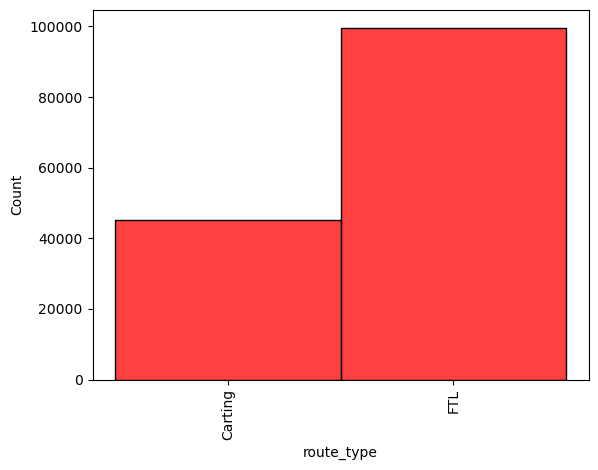

In [16]:
sn.histplot(df1['route_type'],color='red')  # Categorical variable
plt.xticks(rotation=90,fontsize=10)
   

Text(0.5, 1.0, 'data Distribution')

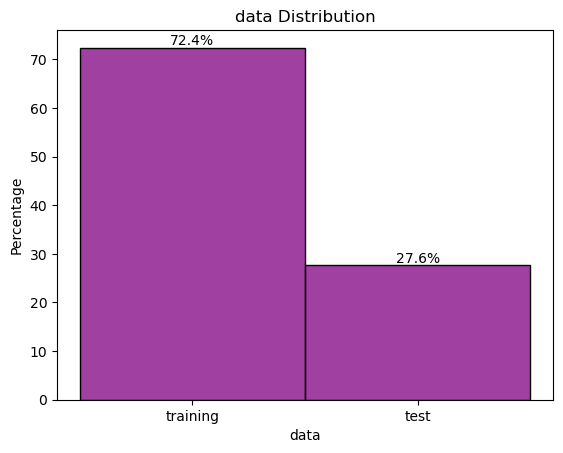

In [17]:

ax =sn.histplot(df1['data'],color='purple', stat='percent')  # Categorical variable
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('data')
plt.ylabel('Percentage')
plt.title('data Distribution')



### 2. Try merging the rows using the hint mentioned below.

In [18]:
segment_key = df1['trip_uuid'] + '_' + df1['source_center'] + '_' + df1['destination_center']
df1['segment_key'] = segment_key
df1.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171,trip-153741093647649320_IND388620AAB_IND388320AAA
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719,trip-153741093647649320_IND388620AAB_IND388320AAA
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362,trip-153741093647649320_IND388620AAB_IND388320AAA
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648,trip-153741093647649320_IND388620AAB_IND388320AAA
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434,trip-153741093647649320_IND388620AAB_IND388320AAA


In [19]:
# Group by segment_key and aggregate
segment_cols=['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
for col in segment_cols:
    df1[col + '_sum'] = df1.groupby('segment_key')[col].cumsum()


df1[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [20]:
create_segment_dict={
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name': 'first',
    'destination_center' : 'last',
    'destination_name': 'last',
    'od_start_time': 'first',
    'od_end_time': 'first',
    'start_scan_to_end_scan': 'first',
    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',
    'segment_actual_time_sum': 'last',
    'segment_osrm_time_sum': 'last',
    'segment_osrm_distance_sum': 'last'
}

# Group by segment_key and aggregate
df1_grouped = df1.groupby('segment_key').agg(create_segment_dict).reset_index().sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()
df1_grouped

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069_IND628204AAA_IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,26364,trip-153861115439069069_IND628613AAA_IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,26365,trip-153861115439069069_IND628801AAA_IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,26366,trip-153861118270144424_IND583119AAA_IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [21]:
df1_grouped.isna().sum()

index                              0
segment_key                        0
data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
trip_uuid                          0
source_center                      0
source_name                       66
destination_center                 0
destination_name                  81
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time_sum            0
segment_osrm_time_sum              0
segment_osrm_distance_sum          0
dtype: int64

In [22]:
# removing all null values
df1_grouped=df1_grouped.dropna()
df1_grouped.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


### 3. Feature Engineering:

In [23]:
# Calculate time taken between od_start_time and od_end_time
df1_grouped['od_time_diff_hour'] = (df1_grouped['od_end_time'] - df1_grouped['od_start_time']).dt.total_seconds() / 3600
df1_grouped['od_time_diff_hour']

0        21.010074
1        16.658423
2         0.980540
3         2.046325
4        13.910649
           ...    
26363     1.035253
26364     1.518130
26365     0.736240
26366     4.791233
26367     1.115559
Name: od_time_diff_hour, Length: 26222, dtype: float64

In [24]:
df1_grouped['destination_name'] = df1_grouped['destination_name'].str.lower() #lowering all columns
df1_grouped['source_name'] = df1_grouped['source_name'].str.lower()

In [25]:
# Extract features from destination_name and source_name [City-place-code(State)]
df1_grouped['destination_state'] =df1_grouped['destination_name'].apply(lambda x: x.split('(')[1][:-1].strip())
df1_grouped['source_state'] = df1_grouped['source_name'].apply(lambda x: x.split('(')[1][:-1].strip())

In [26]:
df1_grouped['destination_city'] =df1_grouped['destination_name'].apply(lambda x: x.split('(')[0].split('_')[0].strip())
df1_grouped['source_city'] = df1_grouped['source_name'].apply(lambda x: x.split('(')[0].split('_')[0].strip())

In [27]:
def place2city_place(x):

    # We will remove state
    x = x.split(' (')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # Small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]
    return x.split(' ')[0]

df1_grouped['destination_place'] =df1_grouped['destination_name'].apply(lambda x: place2city_place(x).strip())
df1_grouped['source_place'] = df1_grouped['source_name'].apply(lambda x: place2city_place(x).strip())

In [28]:
df1_grouped

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,destination_state,source_state,destination_city,source_city,destination_place,source_place
0,0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND000000ACB,...,728.0,534.0,670.6205,21.010074,haryana,uttar pradesh,gurgaon,kanpur,bilaspur,central
1,1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,bhopal_trnsport_h (madhya pradesh),IND209304AAA,...,820.0,474.0,649.8528,16.658423,uttar pradesh,madhya pradesh,kanpur,bhopal,central,trnsport
2,2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND562101AAA,...,46.0,26.0,28.1995,0.980540,karnataka,karnataka,chikblapur,doddablpur,shntisgr,chikadpp
3,3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),IND561203AAB,...,95.0,39.0,55.9899,2.046325,karnataka,karnataka,doddablpur,tumkur,chikadpp,veersagr
4,4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND160002AAC,...,608.0,231.0,317.7408,13.910649,punjab,haryana,chandigarh,gurgaon,mehmdpur,bilaspur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069_IND628204AAA_IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),IND627657AAA,...,49.0,42.0,42.1431,1.035253,tamil nadu,tamil nadu,thisayanvilai,tirchchndr,udnkdird,shnmgprm
26364,26364,trip-153861115439069069_IND628613AAA_IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,peikulam_srivnktpm_d (tamil nadu),IND627005AAA,...,89.0,77.0,78.5869,1.518130,tamil nadu,tamil nadu,tirunelveli,peikulam,vdkkusrt,srivnktpm
26365,26365,trip-153861115439069069_IND628801AAA_IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,eral_busstand_d (tamil nadu),IND628204AAA,...,29.0,14.0,16.0184,0.736240,tamil nadu,tamil nadu,tirchchndr,eral,shnmgprm,busstand
26366,26366,trip-153861118270144424_IND583119AAA_IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,sandur_wrdn1dpp_d (karnataka),IND583101AAA,...,233.0,42.0,52.5303,4.791233,karnataka,karnataka,bellary,sandur,bellary,wrdn1dpp


In [29]:
# Extract features from trip_creation_time
df1_grouped['trip_creation_time'] = pd.to_datetime(df1_grouped['trip_creation_time'])
df1_grouped['trip_month'] = df1_grouped['trip_creation_time'].dt.month
df1_grouped['trip_year'] = df1_grouped['trip_creation_time'].dt.year
df1_grouped['trip_day'] = df1_grouped['trip_creation_time'].dt.day
df1_grouped['trip_week'] = df1_grouped['trip_creation_time'].dt.isocalendar().week
df1_grouped['trip_hour'] = df1_grouped['trip_creation_time'].dt.hour
df1_grouped['trip_dayofweek'] = df1_grouped['trip_creation_time'].dt.dayofweek

In [30]:
df1_grouped['source_state'].value_counts()

maharashtra               3565
karnataka                 3445
tamil nadu                2130
haryana                   2039
uttar pradesh             1818
telangana                 1474
gujarat                   1401
west bengal               1368
andhra pradesh            1310
rajasthan                 1162
punjab                    1052
bihar                     1048
delhi                      818
kerala                     762
madhya pradesh             740
assam                      484
uttarakhand                369
jharkhand                  301
orissa                     248
himachal pradesh           223
chandigarh                 160
goa                         86
chhattisgarh                52
arunachal pradesh           48
jammu & kashmir             47
pondicherry                 30
dadra and nagar haveli      15
meghalaya                   13
mizoram                      8
nagaland                     5
tripura                      1
Name: source_state, dtype: int64

In [31]:
# Identify the busiest source_state
busiest_source_state = df1_grouped['source_state'].value_counts().idxmax()
busiest_source_state_count = df1_grouped['source_state'].value_counts().max()

print(f"Busiest source_state: {busiest_source_state} with {busiest_source_state_count} trips")

Busiest source_state: maharashtra with 3565 trips


In [32]:
df1_grouped['destination_state'].value_counts()

karnataka                 3497
maharashtra               3473
tamil nadu                2111
haryana                   2014
uttar pradesh             1828
telangana                 1539
gujarat                   1401
west bengal               1399
andhra pradesh            1309
rajasthan                 1201
punjab                    1132
bihar                     1053
kerala                     746
madhya pradesh             739
delhi                      702
assam                      465
uttarakhand                367
jharkhand                  309
orissa                     260
himachal pradesh           241
chandigarh                 123
goa                         86
arunachal pradesh           55
chhattisgarh                52
jammu & kashmir             45
pondicherry                 31
dadra and nagar haveli      17
meghalaya                   13
mizoram                     10
tripura                      2
nagaland                     1
daman & diu                  1
Name: de

In [33]:
# Identify the busiest destination_state
busiest_destination_state = df1_grouped['destination_state'].value_counts().idxmax()
busiest_destination_state_count = df1_grouped['destination_state'].value_counts().max()

print(f"Busiest destination_state: {busiest_destination_state} with {busiest_destination_state_count} trips")

Busiest destination_state: karnataka with 3497 trips


In [34]:
df1_grouped['source_city'].value_counts()

bengaluru     1136
gurgaon       1130
bhiwandi       821
bangalore      792
mumbai         719
              ... 
surathkal        1
balipara         1
madnapalle       1
naharlagun       1
kapadvanj        1
Name: source_city, Length: 1245, dtype: int64

In [35]:
# Identify the busiest source_city
busiest_source_city = df1_grouped['source_city'].value_counts().idxmax()
busiest_source_city_count = df1_grouped['source_city'].value_counts().max()

print(f"Busiest source_city: {busiest_source_city} with {busiest_source_city_count} trips")

Busiest source_city: bengaluru with 1136 trips


In [36]:
df1_grouped['destination_city'].value_counts()

bengaluru       1180
mumbai          1000
gurgaon          986
bangalore        683
hyderabad        643
                ... 
dhoraji            1
kothanalloor       1
baghpat            1
north delhi        1
lunawada           1
Name: destination_city, Length: 1242, dtype: int64

In [37]:

# Identify the busiest destination_city
busiest_destination_city = df1_grouped['destination_city'].value_counts().idxmax()
busiest_destination_city_count = df1_grouped['destination_city'].value_counts().max()

print(f"Busiest destination_city: {busiest_destination_city} with {busiest_destination_city_count} trips")

Busiest destination_city: bengaluru with 1180 trips


In [38]:
# Create a new column for the route
df1_grouped['route'] = df1_grouped['source_city'] + ' -> ' + df1_grouped['destination_city']

# Identify the busiest route
busiest_route = df1_grouped['route'].value_counts().idxmax()
busiest_route_count = df1_grouped['route'].value_counts().max()

print(f"Busiest route: {busiest_route} with {busiest_route_count} trips")

Busiest route: bengaluru -> bengaluru with 565 trips


In [39]:
# Identify emerging routes
# Count the number of trips per route per month

route_monthly_counts = df1_grouped.groupby(['route', 'trip_month']).size().unstack(fill_value=0)

# Calculate the trend for each route
route_trends = route_monthly_counts.apply(lambda x: x.diff().fillna(0).mean(), axis=1)
emerging_route = route_trends.idxmax()
emerging_route_trend = route_trends.max()

print(f"Emerging route: {emerging_route} with an average monthly increase of {emerging_route_trend:.2f} trips")

Emerging route: ccu -> baruipur with an average monthly increase of 1.50 trips


In [40]:
# Busiest Month

# Month counts
month_counts = df1_grouped['trip_month'].value_counts()
print("Trips per month:")
print(month_counts)

busiest_month = df1_grouped['trip_month'].value_counts().idxmax()
print(f"The busiest month is: {busiest_month}")

Trips per month:
9     23054
10     3168
Name: trip_month, dtype: int64
The busiest month is: 9


In [41]:
# Busiest Day

# Day counts
day_counts = df1_grouped['trip_day'].value_counts()
print("Trips per day:")
print(day_counts)
busiest_day = df1_grouped['trip_day'].value_counts().idxmax()
print(f"The busiest day is: {busiest_day}")

Trips per day:
18    1373
21    1358
13    1320
20    1319
25    1319
14    1296
15    1293
17    1293
12    1290
22    1276
26    1261
24    1164
27    1156
19    1151
3     1117
16    1098
23    1082
28    1064
1     1035
29    1022
2     1016
30     919
Name: trip_day, dtype: int64
The busiest day is: 18


<Axes: >

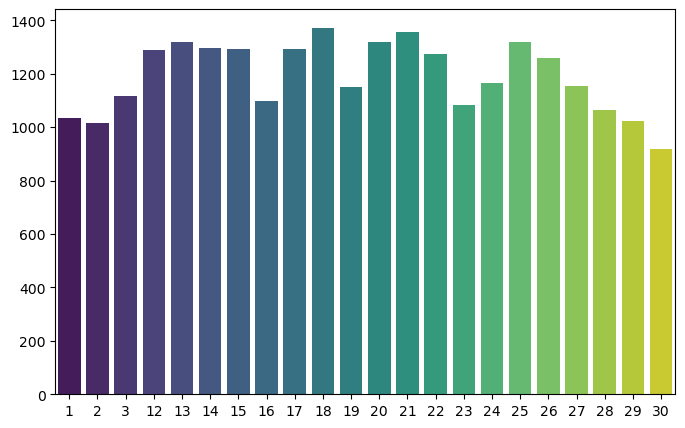

In [42]:
day_counts = df1_grouped['trip_day'].value_counts().sort_index()

# Plotting the trips per day
plt.figure(figsize=(8, 5))
sn.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")


In [43]:
# Busiest Week

# Week counts
week_counts = df1_grouped['trip_week'].value_counts()
print("Trips per week:")
print(week_counts)
busiest_week = df1_grouped['trip_week'].value_counts().idxmax()
print(f"The busiest week is: {busiest_week}")


Trips per week:
38    8852
39    7905
37    6297
40    3168
Name: trip_week, dtype: Int64
The busiest week is: 38


In [44]:
# Busiest year

# Year counts
year_counts = df1_grouped['trip_year'].value_counts()
print("Trips per week:")
print(year_counts)
busiest_year = df1_grouped['trip_year'].value_counts().idxmax()
print(f"The busiest year is: {busiest_year}")


Trips per week:
2018    26222
Name: trip_year, dtype: int64
The busiest year is: 2018


### 4. In-depth analysis:

In [45]:
create_trip_dict={
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name': 'first',
    'destination_center' : 'last',
    'destination_name': 'last',
    'od_time_diff_hour': 'sum',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time_sum': 'sum',
    'segment_osrm_time_sum': 'sum',
    'segment_osrm_distance_sum': 'sum'
}

In [46]:
df1_grouped2=df1_grouped.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)
df1_grouped2

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),37.668497,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),3.026865,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),65.572709,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),1.674916,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),11.972484,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),4.300482,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),1.009842,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),7.035331,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),5.808548,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


In [47]:
df1_grouped2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  object        
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   od_time_diff_hour               14787 non-null  float64       
 10  start_scan_to_end_scan          14787 non-null  float64       
 11  ac

In [48]:
numerical_columns = [
    'od_time_diff_hour','start_scan_to_end_scan', 'actual_distance_to_destination',
    'actual_time', 'osrm_time', 'osrm_distance',
    'segment_actual_time_sum', 'segment_osrm_time_sum', 'segment_osrm_distance_sum'
]

In [50]:
# Function to identify outliers using IQR method
def find_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

outliers = find_outliers_iqr(df1_grouped2[numerical_columns])


<Axes: >

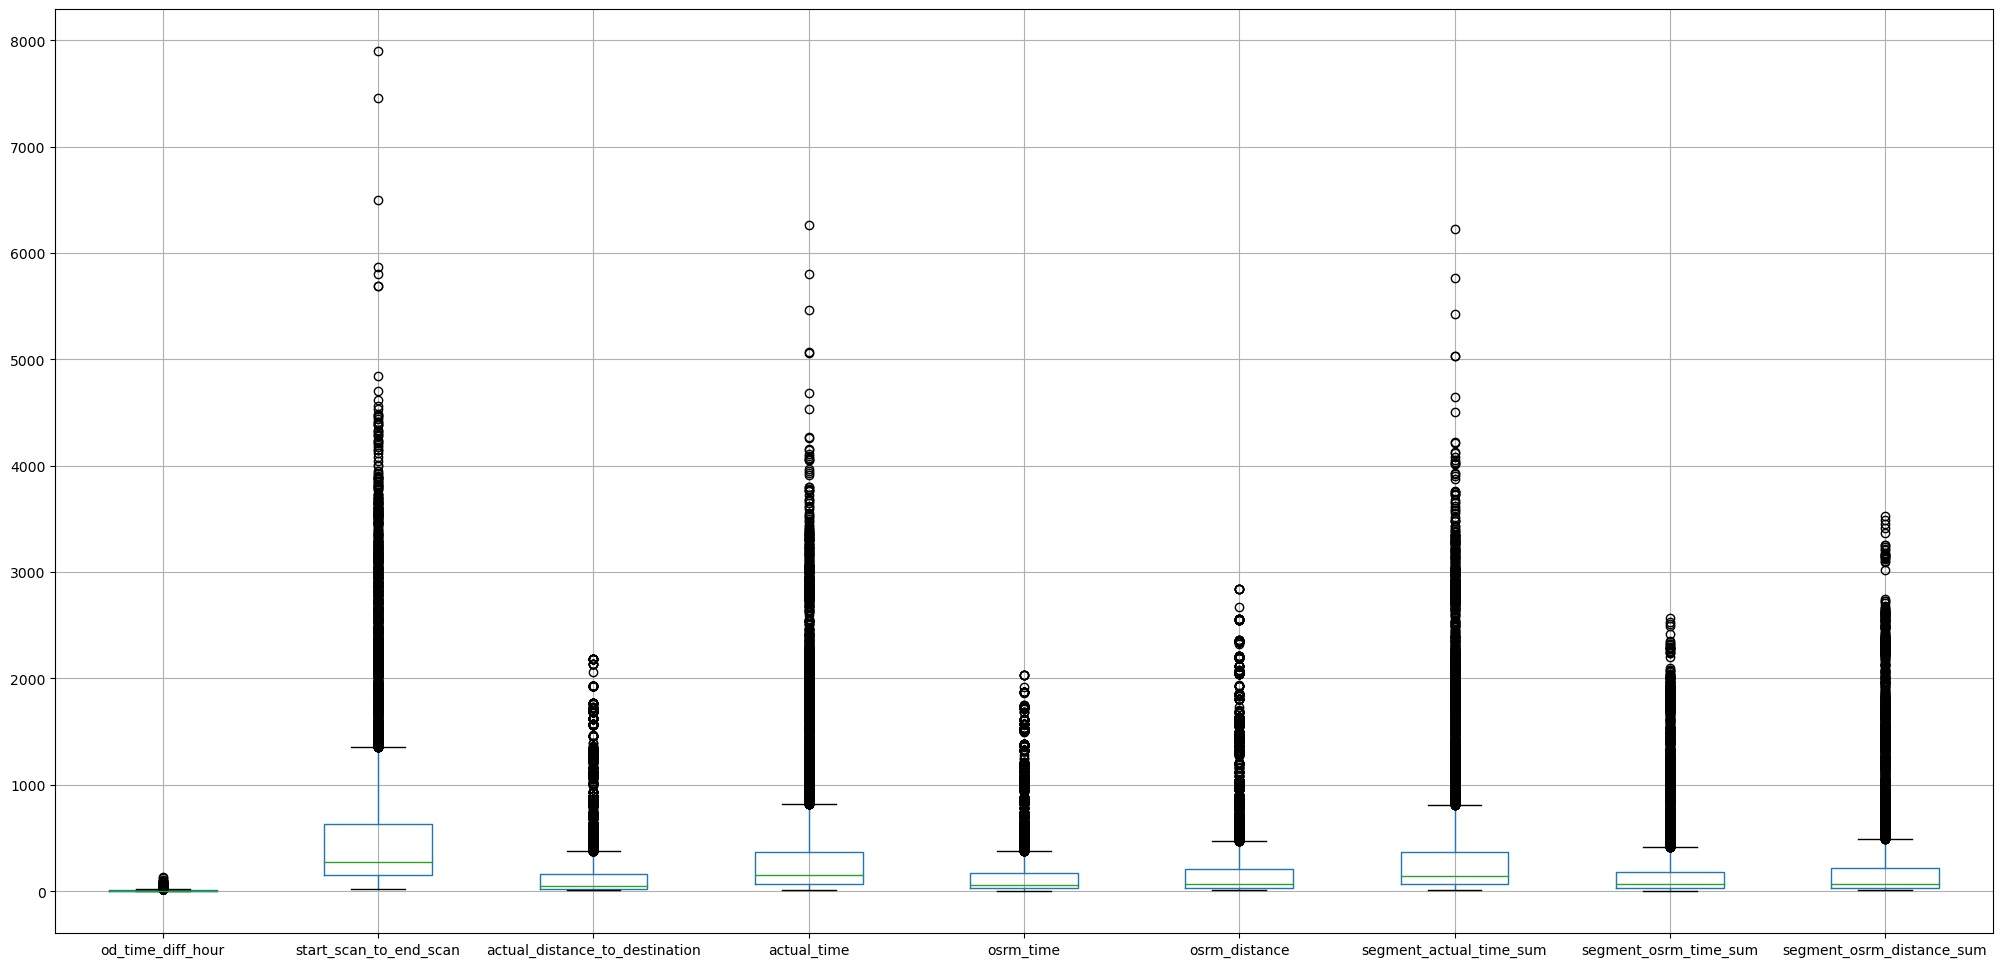

In [51]:
# Visualize outliers using boxplots
df1_grouped2[numerical_columns].boxplot(figsize=(25,12))

In [52]:
# Function to cap outliers using IQR method
def cap_outliers_iqr(df):
    df_capped = df.copy()
    for col in df_capped.select_dtypes(include=[np.number]).columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
    return df_capped

df1_grouped2[numerical_columns] = cap_outliers_iqr(df1_grouped2[numerical_columns])


<Axes: >

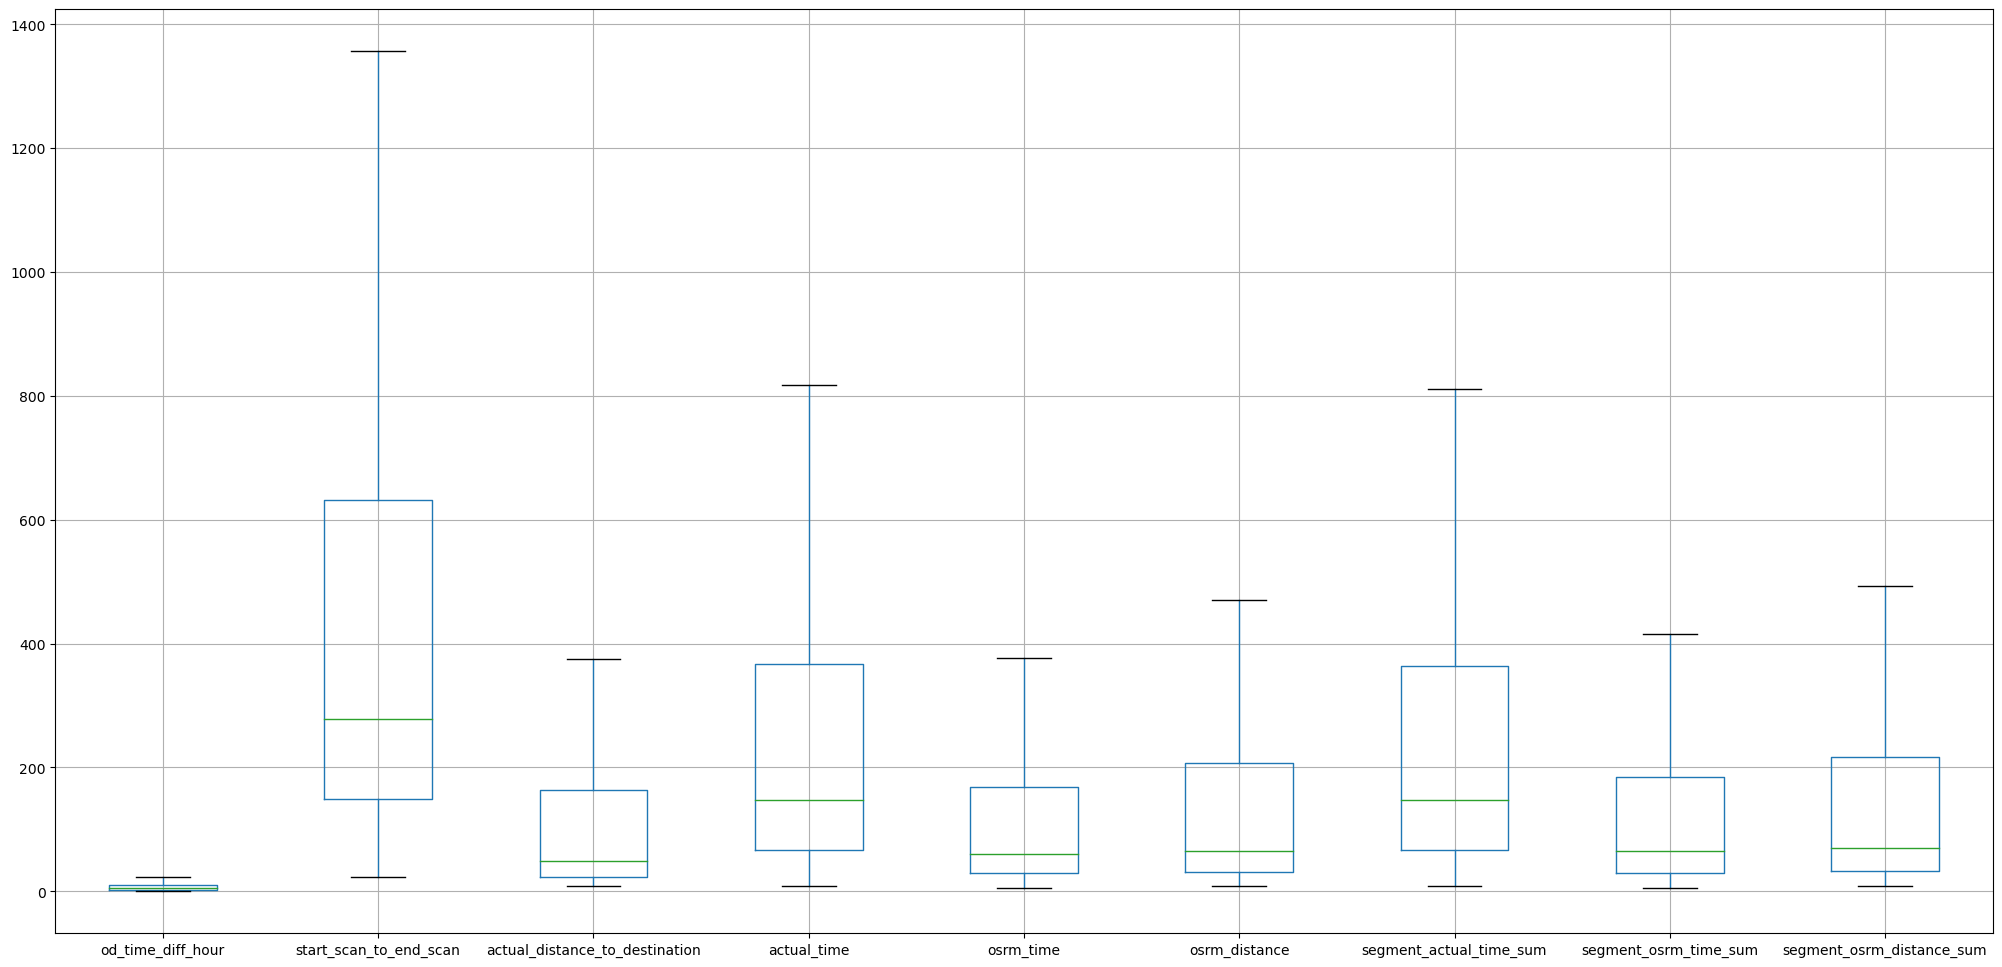

In [53]:
df1_grouped2[numerical_columns].boxplot(figsize=(25,12))

([0, 1], [Text(0, 0, 'FTL'), Text(1, 0, 'Carting')])

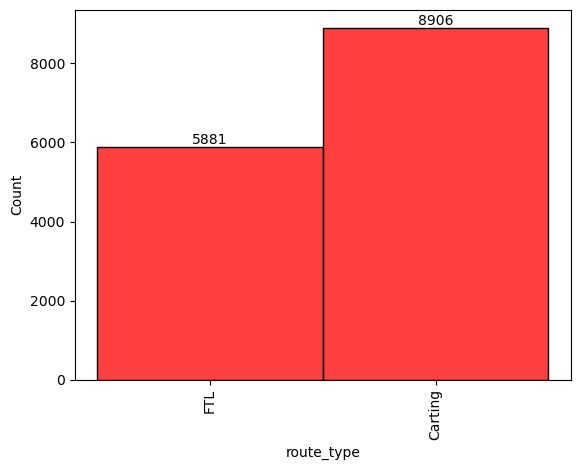

In [54]:
ax=sn.histplot(df1_grouped2['route_type'],color='red')  # Categorical variable
for i in ax.containers:
  ax.bar_label(i,)
plt.xticks(rotation=90,fontsize=10)

In [55]:
5881/(5881+8906),8906/(5881+8906)

(0.39771420842632044, 0.6022857915736796)

In [56]:
#One-hot encode route_type
df1_grouped2 = pd.get_dummies(df1_grouped2, columns=['route_type'])

In [57]:
#Normalize/Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['od_time_diff_hour','start_scan_to_end_scan', 'actual_distance_to_destination',
    'actual_time', 'osrm_time', 'osrm_distance',
    'segment_actual_time_sum', 'segment_osrm_time_sum', 'segment_osrm_distance_sum']
df1_grouped2[numerical_features] = scaler.fit_transform(df1_grouped2[numerical_features])


### 5. Hypothesis Testing:

In [58]:
df1_grouped2[['actual_time', 'segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,2.141392,2.141970
1,-0.460518,-0.462704
2,2.141392,2.141970
3,-0.784792,-0.781485
4,0.303841,0.310923
...,...,...
14782,-0.692143,-0.692070
14783,-0.931487,-0.929212
14784,0.076077,0.081556
14785,0.006590,-0.007858


In [59]:
from scipy.stats import shapiro
test_stat, p_value=shapiro(df1_grouped2['actual_time'])
if p_value < 0.05:
    print(f"t-statistic={test_stat}, p-value={p_value}")
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print(f"t-statistic={test_stat}, p-value={p_value}")
    print("Fail to reject H0")
    print("Data is Gaussian")

t-statistic=0.7885547876358032, p-value=0.0
Reject H0
Data is not Gaussian


In [60]:
test_stat, p_value=shapiro(df1_grouped2['segment_actual_time_sum'])
if p_value < 0.05:
    print(f"t-statistic={test_stat}, p-value={p_value}")
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print(f"t-statistic={test_stat}, p-value={p_value}")
    print("Fail to reject H0")
    print("Data is Gaussian")

t-statistic=0.7881296873092651, p-value=0.0
Reject H0
Data is not Gaussian


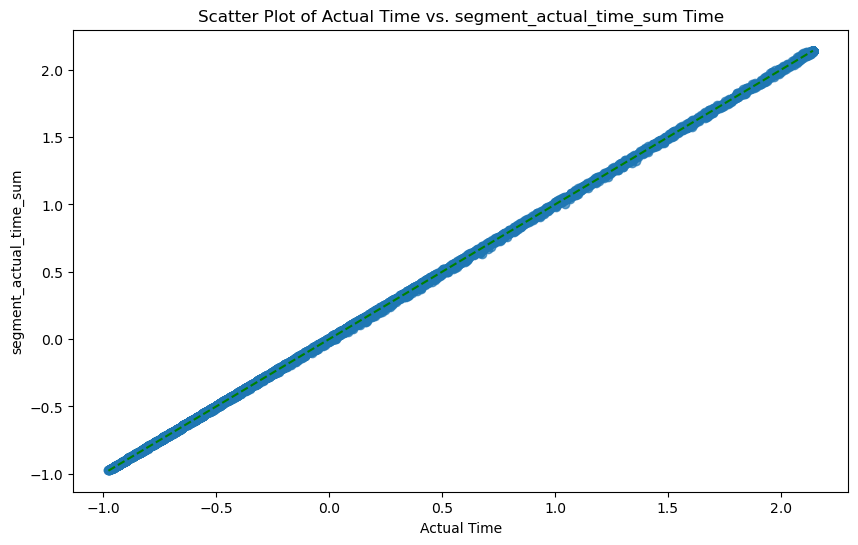

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(df1_grouped2['actual_time'], df1_grouped2['segment_actual_time_sum'], alpha=0.7)

# Add line with slope 1
min_val = min(df1_grouped2[['actual_time', 'segment_actual_time_sum']].min())
max_val = max(df1_grouped2[['actual_time', 'segment_actual_time_sum']].max())
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label='y = x Line')

plt.xlabel('Actual Time')
plt.ylabel('segment_actual_time_sum')
plt.title('Scatter Plot of Actual Time vs. segment_actual_time_sum Time')
plt.show()

Perform a paired t-test to compare the means of the actual_time and segment_actual_time_sum.

Assumptions
Null Hypothesis (H0): The mean difference between actual_time and segment_actual_time_sum is zero.

Alternative Hypothesis (H1): The mean difference between actual_time and segment_actual_time_sum is not zero.

In [62]:
from scipy.stats import kruskal
stat, p_value =kruskal(df1_grouped2['actual_time'], df1_grouped2['segment_actual_time_sum'])
stat, p_value

(3.1636747706472756, 0.07529352059756864)

In [63]:
if p_value < 0.05:
    print("Reject H0")
    print("There is a statistically significant difference between the medians of the two groups.")
else:
    print("Fail to reject H0")
    print("There is no statistically significant difference between the medians of the two groups.")

Fail to reject H0
There is no statistically significant difference between the medians of the two groups.


In [64]:
df1_grouped2[['actual_time', 'osrm_time']]

,actual_time,osrm_time
0,2.141392,2.255661
1,-0.460518,-0.400293
2,2.141392,2.255661
3,-0.784792,-0.856583
4,0.303841,0.021561
...,...,...
14782,-0.692143,-0.451948
14783,-0.931487,-0.882411
14784,0.076077,-0.572478
14785,0.006590,0.555334


In [65]:
test_stat, p_value=shapiro(df1_grouped2['osrm_time'])
if p_value < 0.05:
    print(f"t-statistic={test_stat}, p-value={p_value}")
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print(f"t-statistic={test_stat}, p-value={p_value}")
    print("Fail to reject H0")
    print("Data is Gaussian")

t-statistic=0.7811656594276428, p-value=0.0
Reject H0
Data is not Gaussian


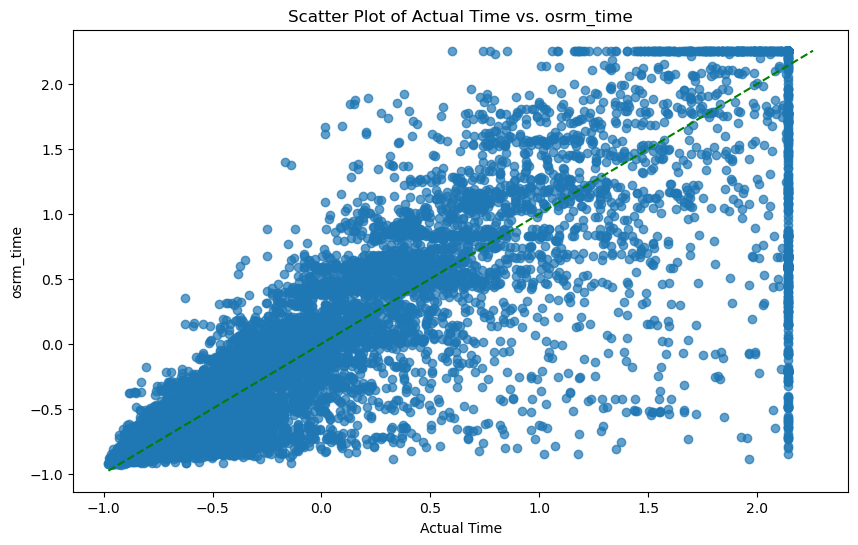

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(df1_grouped2['actual_time'], df1_grouped2['osrm_time'], alpha=0.7)

# Add line with slope 1
min_val = min(df1_grouped2[['actual_time', 'osrm_time']].min())
max_val = max(df1_grouped2[['actual_time', 'osrm_time']].max())
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label='y = x Line')

plt.xlabel('Actual Time')
plt.ylabel('osrm_time')
plt.title('Scatter Plot of Actual Time vs. osrm_time')
plt.show()

Perform a paired t-test to compare the means of the actual_time and osrm_time.

Assumptions
Null Hypothesis (H0): The mean difference between actual_time and osrm_time is zero.

Alternative Hypothesis (H1): The mean difference between actual_time and osrm_time is not zero.

In [67]:
from scipy.stats import kruskal
stat, p_value =kruskal(df1_grouped2['actual_time'], df1_grouped2['osrm_time'])
stat, p_value

(11.540847554837315, 0.0006808359480980392)

In [68]:
if p_value < 0.05:
    print("Reject H0")
    print("There is a statistically significant difference between the medians of the two groups.")
else:
    print("Fail to reject H0")
    print("There is no statistically significant difference between the medians of the two groups.")

Reject H0
There is a statistically significant difference between the medians of the two groups.


In [69]:
df1_grouped2[['actual_distance_to_destination','osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,2.281370,2.271659
1,-0.302255,-0.358333
2,2.281370,2.271659
3,-0.782032,-0.804880
4,0.162532,0.062619
...,...,...
14782,-0.434377,-0.437827
14783,-0.796264,-0.829393
14784,-0.597789,-0.537190
14785,0.224850,0.228586


In [70]:
test_stat, p_value=shapiro(df1_grouped2['actual_distance_to_destination'])
if p_value < 0.05:
    print(f"t-statistic={test_stat}, p-value={p_value}")
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print(f"t-statistic={test_stat}, p-value={p_value}")
    print("Fail to reject H0")
    print("Data is Gaussian")

t-statistic=0.7671483755111694, p-value=0.0
Reject H0
Data is not Gaussian


In [71]:
test_stat, p_value=shapiro(df1_grouped2['osrm_distance'])
if p_value < 0.05:
    print(f"t-statistic={test_stat}, p-value={p_value}")
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print(f"t-statistic={test_stat}, p-value={p_value}")
    print("Fail to reject H0")
    print("Data is Gaussian")

t-statistic=0.7695093154907227, p-value=0.0
Reject H0
Data is not Gaussian


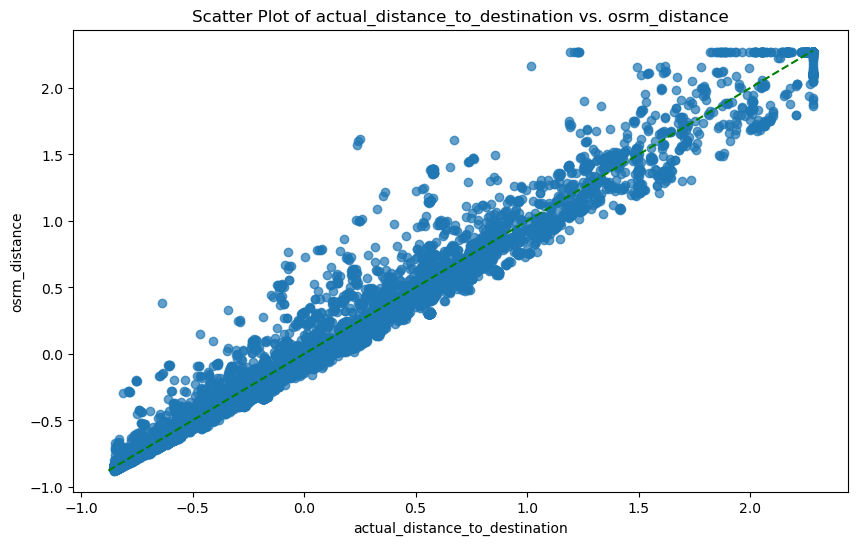

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(df1_grouped2['actual_distance_to_destination'], df1_grouped2['osrm_distance'], alpha=0.7)

# Add line with slope 1
min_val = min(df1_grouped2[['actual_distance_to_destination', 'osrm_distance']].min())
max_val = max(df1_grouped2[['actual_distance_to_destination', 'osrm_distance']].max())
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label='y = x Line')

plt.xlabel('actual_distance_to_destination')
plt.ylabel('osrm_distance')
plt.title('Scatter Plot of actual_distance_to_destination vs. osrm_distance')
plt.show()

Perform a paired t-test to compare the means of the actual_distance_to_destination and osrm_distance.

Assumptions
Null Hypothesis (H0): The mean difference between actual_distance_to_destination and osrm_distance is zero.

Alternative Hypothesis (H1): The mean difference between actual_distance_to_destination and osrm_distance is not zero.

In [73]:
from scipy.stats import kruskal
stat, p_value =kruskal(df1_grouped2['actual_distance_to_destination'], df1_grouped2['osrm_distance'])
stat, p_value

(3.909703205449902, 0.04800807489685815)

In [74]:
if p_value < 0.05:
    print("Reject H0")
    print("There is a statistically significant difference between the medians of the two groups.")
else:
    print("Fail to reject H0")
    print("There is no statistically significant difference between the medians of the two groups.")

Reject H0
There is a statistically significant difference between the medians of the two groups.


In [75]:
df1_grouped2[['osrm_time','segment_osrm_time_sum']]

,osrm_time,segment_osrm_time_sum
0,2.255661,2.259726
1,-0.400293,-0.473161
2,2.255661,2.259726
3,-0.856583,-0.855766
4,0.021561,-0.082749
...,...,...
14782,-0.451948,-0.496586
14783,-0.882411,-0.894807
14784,-0.572478,-0.293572
14785,0.555334,0.744926


In [76]:
test_stat, p_value=shapiro(df1_grouped2['segment_osrm_time_sum'])
if p_value < 0.05:
    print(f"t-statistic={test_stat}, p-value={p_value}")
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print(f"t-statistic={test_stat}, p-value={p_value}")
    print("Fail to reject H0")
    print("Data is Gaussian")

t-statistic=0.7843230962753296, p-value=0.0
Reject H0
Data is not Gaussian


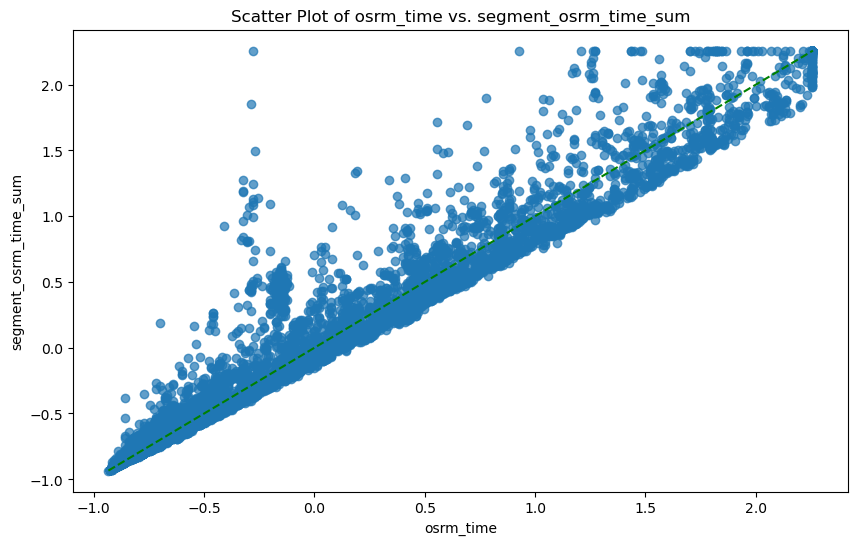

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(df1_grouped2['osrm_time'], df1_grouped2['segment_osrm_time_sum'], alpha=0.7)

# Add line with slope 1
min_val = min(df1_grouped2[['osrm_time', 'segment_osrm_time_sum']].min())
max_val = max(df1_grouped2[['osrm_time', 'segment_osrm_time_sum']].max())
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label='y = x Line')

plt.xlabel('osrm_time')
plt.ylabel('segment_osrm_time_sum')
plt.title('Scatter Plot of osrm_time vs. segment_osrm_time_sum')
plt.show()

Perform a paired t-test to compare the means of the osrm_time and segment_osrm_time_sum.

Assumptions
Null Hypothesis (H0): The mean difference between osrm_time and segment_osrm_time_sum is zero.

Alternative Hypothesis (H1): The mean difference between osrm_time and segment_osrm_time_sum is not zero.

In [78]:
from scipy.stats import kruskal
stat, p_value =kruskal(df1_grouped2['osrm_time'], df1_grouped2['segment_osrm_time_sum'])
stat, p_value

(0.6862355444741132, 0.4074477706514751)

In [79]:
if p_value < 0.05:
    print("Reject H0")
    print("There is a statistically significant difference between the medians of the two groups.")
else:
    print("Fail to reject H0")
    print("There is no statistically significant difference between the medians of the two groups.")

Fail to reject H0
There is no statistically significant difference between the medians of the two groups.


### Inferences

In this case stud we deal with Delhivery's loistics data of the month of september and october of the year 2018.

Here the data is classified as training and testing data.training data makes 72.4% of total data and testing data makes 27.6%.

Delhivery deals with two types of transportation which is either full truck load (FTL) or handling system consisting of small vehicles( carting).Of the two transportation ,FTL operates 5881 times whereas carting engages 8906 times .making carting engages 60 % of the logistics and FLT 40%.

Busiest destination_state is karnataka with 3497 trips leaving maharashtra second 3473 trips

Busiest source_state is maharashtra with 3565 trips leaving karnataka second 3445 trips.

Bangalore and guraon is the busiest sourcecity and bangalore and mumbai leads as busiest destination city.

bangalore -> bangalore is the busiest route with565 trips in two months.

ccu -> baruipur ie kolkata to baruipur is the emerging route with an average monthly increase of 1.50 trips.

There is no  distinguishable variations in trips per day,most of it ranges with 1000s per day.

Through hypothesis testing it is found that there is not much difference between the actual time for delhivery and sum of segment delhivery time.

Through hypothesis testing it is found that there is  much of adifference between the actual time for delhivery and osrm time.Indicating the open-source routing engine time calculator is not predicting accuratly the time.

Through hypothesis testing it is found that there is  much of a  difference between actual_distance_to_destination and osrm_distance.Indicating that the  open-source routing engine is not predicting accuratly the distance

Through hypothesis testing it is found that there is  much of a difference between osrm_time and segment_osrm_time_sum.Indicating that total time predicted by open-source routing engine time calculator and sum of the segmented time are different.

### Recommendations

1.Optimize Carting Operations:

Increase Efficiency: Since carting operations account for 60% of the logistics activities, there is a significant opportunity to optimize these operations. Focus on improving route planning, vehicle utilization, and reducing idle times.
Technology Integration: Implement advanced fleet management systems that can provide real-time tracking, route optimization, and predictive maintenance to enhance carting efficiency.

2.Enhance Full Truck Load (FTL) Operations:

Improve Load Planning: Since FTL operations make up 40% of the logistics, ensure that trucks are fully utilized by improving load planning and consolidation.
Reduce Empty Runs: Analyze patterns of empty runs and strategize to minimize them, possibly by coordinating with other logistics providers or using a digital freight platform.

3.Focus on Key States:

Karnataka and Maharashtra: Given that Karnataka and Maharashtra are the busiest states in terms of destinations and sources respectively, prioritize these states for resource allocation, infrastructure development, and service improvements.
Urban Logistics: Bangalore, Mumbai, and Gurgaon being key cities, should be focal points for urban logistics strategies. This includes investing in last-mile delivery solutions, urban warehousing, and distribution centers.

4.Emerging Routes:

Support Emerging Routes: With routes like Kolkata to Baruipur showing growth, allocate resources to support and expand services on these emerging routes. Consider incentives for frequent routes and capacity planning to accommodate growth.

5.Address Day-to-Day Variations:

Daily Optimization: Even though there are no significant variations in trips per day, maintaining consistent performance and avoiding peaks and troughs is essential. Utilize predictive analytics to forecast daily demands and adjust operations accordingly.

6.Improve Delivery Time Accuracy:

Review Time Predictions: Since hypothesis testing indicates discrepancies between actual delivery times and OSRM (Open Source Routing Machine) times, invest in improving your time prediction algorithms. This could involve using machine learning models that factor in real-time traffic, weather, and other variables.
Benchmarking and Calibration: Regularly benchmark and calibrate OSRM with actual delivery data to enhance its accuracy.

7.Enhance Distance Accuracy:

Refine Distance Calculations: Address the differences between actual distances and OSRM distances by refining your distance calculation methods. Consider integrating alternative mapping and routing data sources.
Continuous Monitoring: Implement a continuous monitoring system to regularly validate and update distance data, ensuring higher accuracy in logistics planning.

8.Segmented Time Analysis:

Detailed Time Tracking: Given the differences between OSRM time and segment OSRM time sum, ensure detailed tracking of segmented delivery times. This will help in identifying specific segments where delays occur and enable targeted improvements.
Segment Optimization: Use the insights from segmented time analysis to optimize specific segments of the delivery process, whether it's loading, transit, or unloading times.